数据集下载   
https://archive.ics.uci.edu/dataset/2/adult 


### 预处理(Data Preprocessing)

In [1]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
# from sklearn.model_selection import train_test_split

# data propossing

# define column
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']


train_data = pd.read_csv('adult.data', names=columns, na_values=' ?') ## 将？替换为NaN
test_data = pd.read_csv('adult.test', names=columns, na_values=' ?', skiprows=1)
# print(train_data.head())

# handle missing values
train_clean = train_data.dropna()
print(f"The number of rows with deleted missing values: {len(train_data) - len(train_clean)}")
# process testing data   
test_clean = test_data.dropna()
print(f"The number of rows with deleted missing values: {len(test_data) - len(test_clean)}")

x_train, y_train = train_clean.drop('income', axis=1), train_clean['income']
x_test, y_test = test_clean.drop('income', axis=1), test_clean['income']


cat_cols = train_clean.drop('income', axis=1).select_dtypes(include=['object']).columns
num_cols = train_clean.select_dtypes(include=['number']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)
    ]
)

xtr_train = preprocessor.fit_transform(x_train)
xtr_test = preprocessor.transform(x_test)


The number of rows with deleted missing values: 2399
The number of rows with deleted missing values: 1221


<5%缺失  
可直接删除缺失行，对结果影响可忽略  
适用于数据量较大（>10,000行）的情况  
数据一共近五万条，删除两千多条不影响

### 可视化(Data Visualization)

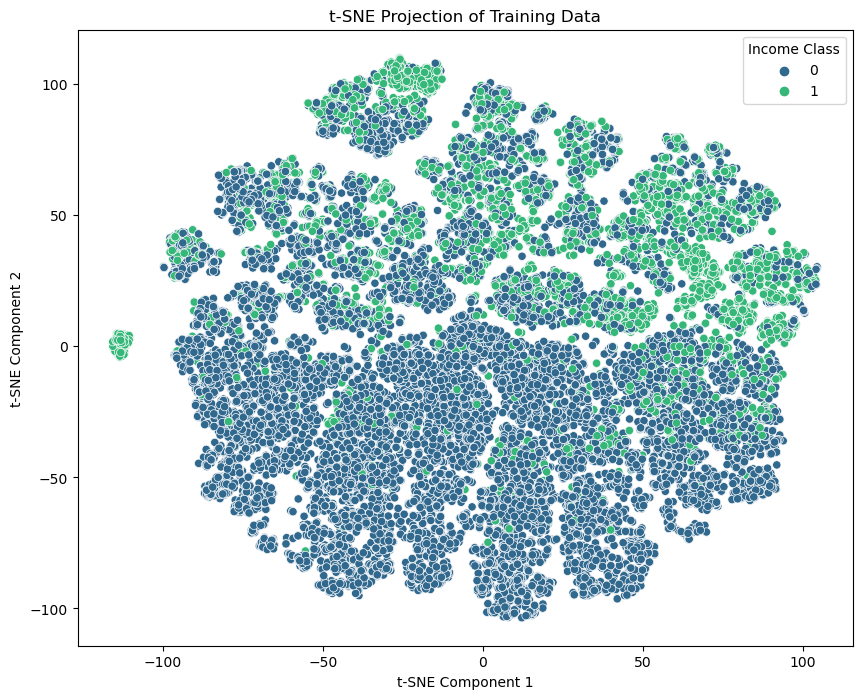

In [2]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
# 使用 t-SNE 进行降维
tsne = TSNE(n_components=2, random_state=42, init = 'random')
xtr_train_tsne = tsne.fit_transform(xtr_train)

# 对类别标签进行编码
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# 创建散点图
plt.figure(figsize=(10, 8))
sns.scatterplot(x=xtr_train_tsne[:, 0], y=xtr_train_tsne[:, 1], hue=y_train_encoded, palette='viridis')
plt.title('t-SNE Projection of Training Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Income Class')
plt.show()

蓝色点和绿色点都有一定程度的聚集，说明不同收入类别样本在特征空间有一定的区分度，但存在部分区域混合。  
绿色和蓝色点在一些区域各有明显聚集，表明不同收入类别样本存在特征相对集中的情况。

### 聚类分析(Clustering Analysis)

d:\python jupyter\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K-means 评估结果:
Silhouette Score: 0.10676306909815066
Calinski-Harabasz Index: 3314.990558635056
Davies-Bouldin Index: 2.793710598719789

层次聚类 评估结果:
Silhouette Score: 0.34570457440261854
Calinski-Harabasz Index: 3178.8828476181284
Davies-Bouldin Index: 1.2055551587312974
DBSCAN 评估结果:
Silhouette Score: -0.42998686019056354
Calinski-Harabasz Index: 6.322361736790917
Davies-Bouldin Index: 1.4392254155208826
高斯混合模型 评估结果:
Silhouette Score: 0.052385478351750135
Calinski-Harabasz Index: 509.06387708133684
Davies-Bouldin Index: 5.284487353470399


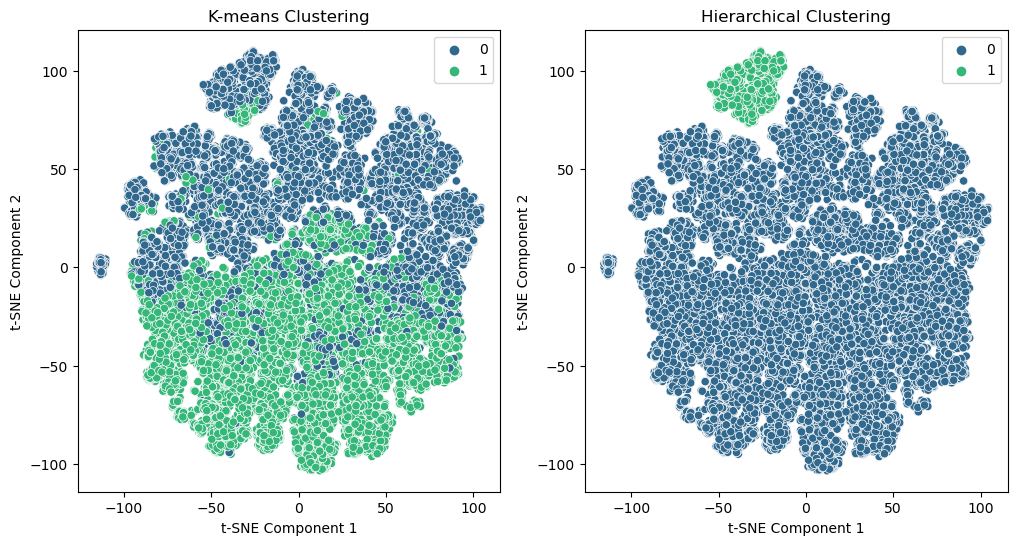

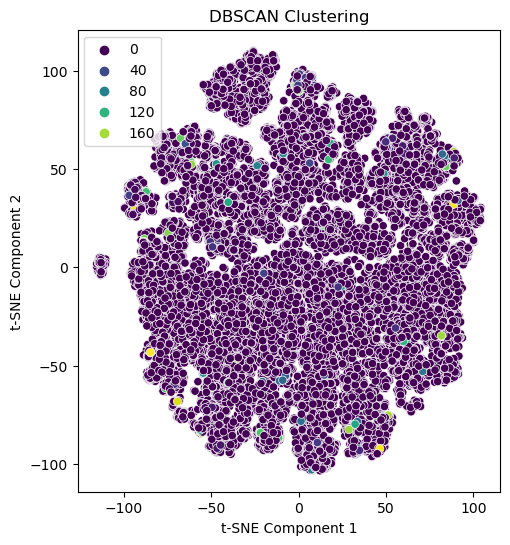

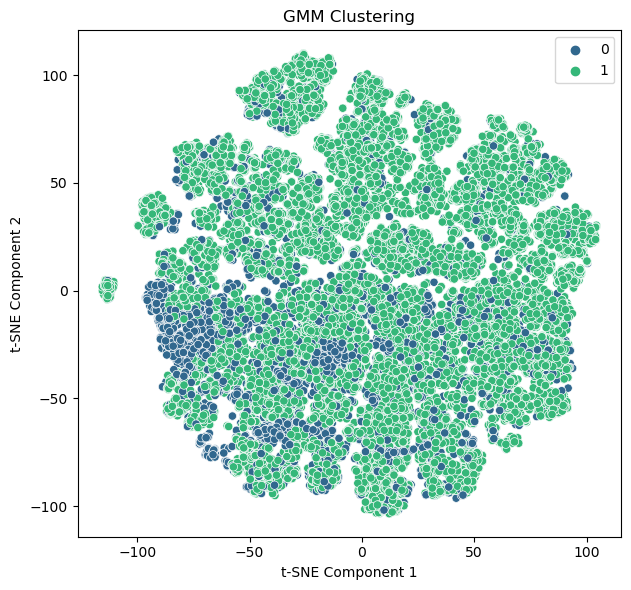


最佳聚类算法: K-means


In [8]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, OPTICS, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import seaborn as sns
from sklearn.manifold import TSNE

xtr_train_dense = xtr_train.toarray()
# 选择聚类算法
# K-means 
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(xtr_train)

# 层次聚类
hierarchical = AgglomerativeClustering(n_clusters=2)

# DBSCAN 算法
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(xtr_train)

# 高斯混合模型
gmm = GaussianMixture(n_components=2, random_state=42, n_init=10)
gmm_labels = gmm.fit_predict(xtr_train_dense)


# 将稀疏矩阵转换为密集数组
hierarchical_labels = hierarchical.fit_predict(xtr_train_dense)
gmm_labels = gmm.fit_predict(xtr_train_dense)


# 评估聚类结果
def evaluate_clustering(labels, data):
    silhouette = silhouette_score(data, labels)
    calinski_harabasz = calinski_harabasz_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)
    return silhouette, calinski_harabasz, davies_bouldin


# 将 xtr_train 转换为密集数组
xtr_train_dense_for_kmeans = xtr_train.toarray()
kmeans_silhouette, kmeans_calinski, kmeans_davies = evaluate_clustering(kmeans_labels, xtr_train_dense_for_kmeans)
hierarchical_silhouette, hierarchical_calinski, hierarchical_davies = evaluate_clustering(hierarchical_labels, xtr_train_dense)


# DBSCAN 算法
dbscan = DBSCAN(eps=0.3, min_samples=5)
# 转换为密集数组后再进行聚类
xtr_train_dense_for_dbscan = xtr_train.toarray() 
dbscan_labels = dbscan.fit_predict(xtr_train_dense_for_dbscan)
# 对 DBSCAN 评估
dbscan_silhouette, dbscan_calinski, dbscan_davies = evaluate_clustering(dbscan_labels, xtr_train_dense_for_dbscan)


# 高斯混合模型
gmm = GaussianMixture(n_components=2, random_state=42)
# 转换为密集数组后再进行聚类
xtr_train_dense_for_gmm = xtr_train.toarray() 
gmm_labels = gmm.fit_predict(xtr_train_dense_for_gmm)
# 对高斯混合模型评估
gmm_silhouette, gmm_calinski, gmm_davies = evaluate_clustering(gmm_labels, xtr_train_dense_for_gmm)


print("K-means 评估结果:")
print(f"Silhouette Score: {kmeans_silhouette}")
print(f"Calinski-Harabasz Index: {kmeans_calinski}")
print(f"Davies-Bouldin Index: {kmeans_davies}")

print("\n层次聚类 评估结果:")
print(f"Silhouette Score: {hierarchical_silhouette}")
print(f"Calinski-Harabasz Index: {hierarchical_calinski}")
print(f"Davies-Bouldin Index: {hierarchical_davies}")

print("DBSCAN 评估结果:")
print(f"Silhouette Score: {dbscan_silhouette}")
print(f"Calinski-Harabasz Index: {dbscan_calinski}")
print(f"Davies-Bouldin Index: {dbscan_davies}")

print("高斯混合模型 评估结果:")
print(f"Silhouette Score: {gmm_silhouette}")
print(f"Calinski-Harabasz Index: {gmm_calinski}")
print(f"Davies-Bouldin Index: {gmm_davies}")

# 可视化聚类结果
# 使用 t-SNE 降维以便可视化
tsne = TSNE(n_components=2, random_state=42, init='random')
xtr_train_tsne = tsne.fit_transform(xtr_train)

# K-means 聚类可视化
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=xtr_train_tsne[:, 0], y=xtr_train_tsne[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-means Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# 层次聚类可视化
plt.subplot(1, 2, 2)
sns.scatterplot(x=xtr_train_tsne[:, 0], y=xtr_train_tsne[:, 1], hue=hierarchical_labels, palette='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# DBSCAN 聚类可视化
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=xtr_train_tsne[:, 0], y=xtr_train_tsne[:, 1], hue=dbscan_labels, palette='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# 高斯混合模型 聚类可视化
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=xtr_train_tsne[:, 0], y=xtr_train_tsne[:, 1], hue=gmm_labels, palette='viridis')
plt.title('GMM Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()

# 确定最佳聚类结果
# Silhouette 得分越接近 1 表示聚类效果越好，Calinski-Harabasz 指数越高表示聚类效果越好，Davies-Bouldin 指数越低表示聚类效果越好
# 整理评估指标
scores = {
    "K-means": (kmeans_silhouette, kmeans_calinski, kmeans_davies),
    "层次聚类": (hierarchical_silhouette, hierarchical_calinski, hierarchical_davies),
    "DBSCAN": (dbscan_silhouette, dbscan_calinski, dbscan_davies),
    "高斯混合模型": (gmm_silhouette, gmm_calinski, gmm_davies)
}

best_score = -float('inf')
best_algorithm = None
# for algorithm, (silhouette, calinski, davies) in scores.items():
#     if all([silhouette is not None, calinski is not None, davies is not None]):
#         score = silhouette + calinski - davies
#         if score > best_score:
#             best_score = score
#             best_algorithm = algorithm

# print(f"\n最佳聚类算法: {best_algorithm}")
    

K-means聚类：  
两类数据点有一定的聚集趋势，但也存在较多混合区域，两者界限不是很明显。  
层次聚类：  
绿色集中在左上角，分离度稍高一些。 

后面俩还不如层次聚类  
DBSCAN:  
高斯混合模型： 

我们选层次聚类  

### 训练和测试(Prediction: Training and Testing)

In [4]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/5e/03/15cd49e855c62226ecf1831bbe4c8e73a4324856077a23c495538a36e557/xgboost-3.0.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 163.8 kB/s eta 0:15:16
   ---------------------------------------- 0.0/150.0 MB 163.8 kB/s eta 0:15:16
   ---------------------------------------- 0.0/150.0 MB 163.4 kB/s eta 0:15:18
   ---------------------------------------- 0.1/150.0 MB 327.7 kB/s eta 0:07:38
   ---------------------------------------- 0.1/150.0 MB 448.2 kB/s eta 0:05:35
   ---------------------------------------- 0.2/150.0 MB 588.9 kB/s eta 0:04:15
   ----------------------------

In [7]:
import pandas as pd
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 处理测试集标签中多余的点
y_test = y_test.str.strip('.')

# 合并特征
x_all = pd.concat([pd.DataFrame(xtr_train.toarray()), pd.DataFrame(xtr_test.toarray())], axis=0)
# 合并标签
y_all = pd.concat([y_train, y_test], axis=0)



# 对标签进行编码
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_all_encoded = label_encoder.transform(y_all)

# XGBoost 模型
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(xtr_train, y_train_encoded)

# SVM 模型
svm_model = SVC(random_state=42)
svm_model.fit(xtr_train, y_train_encoded)

# 随机森林模型
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(xtr_train, y_train_encoded)

# 神经网络模型
input_dim = xtr_train.shape[1]
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=input_dim, activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model.fit(xtr_train.toarray(), y_train_encoded, epochs=10, batch_size=32, verbose=1)

# 预测
# XGBoost 预测
y_pred_train_xgb = xgb_model.predict(xtr_train)
y_pred_test_xgb = xgb_model.predict(xtr_test)
y_pred_all_xgb = xgb_model.predict(x_all)

# SVM 预测
y_pred_train_svm = svm_model.predict(xtr_train)
y_pred_test_svm = svm_model.predict(xtr_test)
y_pred_all_svm = svm_model.predict(x_all)

# 随机森林预测
y_pred_train_rf = rf_model.predict(xtr_train)
y_pred_test_rf = rf_model.predict(xtr_test)
y_pred_all_rf = rf_model.predict(x_all)

# 神经网络预测
y_pred_train_nn = (nn_model.predict(xtr_train.toarray()) > 0.5).astype("int32").flatten()
y_pred_test_nn = (nn_model.predict(xtr_test.toarray()) > 0.5).astype("int32").flatten()
y_pred_all_nn = (nn_model.predict(x_all.to_numpy()) > 0.5).astype("int32").flatten()

# 评估函数
def evaluate_model(y_true, y_pred, model_name, data_set):
    print(f"{model_name} 在 {data_set} 上的评估:")
    print(classification_report(y_true, y_pred))
    print(f"准确率: {accuracy_score(y_true, y_pred)}")
    conf_matrix = confusion_matrix(y_true, y_pred)
    # sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    # plt.title(f'{model_name} - {data_set} 混淆矩阵')
    # plt.xlabel('预测值')
    # plt.ylabel('真实值')
    # plt.show()

# # XGBoost 评估
# evaluate_model(y_train_encoded, y_pred_train_xgb, "XGBoost", "训练集")
evaluate_model(y_test_encoded, y_pred_test_xgb, "XGBoost", "测试集")
# evaluate_model(y_all_encoded, y_pred_all_xgb, "XGBoost", "整个数据集")

# # SVM 评估
# evaluate_model(y_train_encoded, y_pred_train_svm, "SVM", "训练集")
evaluate_model(y_test_encoded, y_pred_test_svm, "SVM", "测试集")
# evaluate_model(y_all_encoded, y_pred_all_svm, "SVM", "整个数据集")

# # 随机森林评估
# evaluate_model(y_train_encoded, y_pred_train_rf, "随机森林", "训练集")
evaluate_model(y_test_encoded, y_pred_test_rf, "随机森林", "测试集")
# evaluate_model(y_all_encoded, y_pred_all_rf, "随机森林", "整个数据集")

# # 神经网络评估
# evaluate_model(y_train_encoded, y_pred_train_nn, "神经网络", "训练集")
evaluate_model(y_test_encoded, y_pred_test_nn, "神经网络", "测试集")
# evaluate_model(y_all_encoded, y_pred_all_nn, "神经网络", "整个数据集")
    
    

Epoch 1/10


d:\python jupyter\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


943/943 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step - accuracy: 0.8179 - loss: 0.3803
Epoch 2/10
943/943 ━━━━━━━━━━━━━━━━━━━━ 1s 718us/step - accuracy: 0.8563 - loss: 0.3110
Epoch 3/10
943/943 ━━━━━━━━━━━━━━━━━━━━ 1s 710us/step - accuracy: 0.8532 - loss: 0.3097
Epoch 4/10
943/943 ━━━━━━━━━━━━━━━━━━━━ 1s 724us/step - accuracy: 0.8605 - loss: 0.3064
Epoch 5/10
943/943 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - accuracy: 0.8637 - loss: 0.3015
Epoch 6/10
943/943 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - accuracy: 0.8616 - loss: 0.2993
Epoch 7/10
943/943 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step - accuracy: 0.8637 - loss: 0.2943
Epoch 8/10
943/943 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - accuracy: 0.8624 - loss: 0.2980
Epoch 9/10
943/943 ━━━━━━━━━━━━━━━━━━━━ 1s 721us/step - accuracy: 0.8646 - loss: 0.2950
Epoch 10/10
943/943 ━━━━━━━━━━━━━━━━━━━━ 1s 710us/step - accuracy: 0.8661 - loss: 0.2943
943/943 ━━━━━━━━━━━━━━━━━━━━ 1s 500us/step
471/471 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 1s 474us/step